In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
train_df = pd.read_csv("train_data.csv")

In [3]:
train_df

delta_min  delta_max  delta_mean     delta_var  theta_min  theta_max  \
0      -0.000915   0.002945    0.000006  3.930000e-07  -0.001156   0.000689   
1      -0.000807   0.002282    0.000004  2.510000e-07  -0.000919   0.000524   
2      -0.000837   0.002054    0.000010  2.020000e-07  -0.000753   0.000472   
3      -0.000617   0.001883    0.000003  1.640000e-07  -0.000738   0.000454   
4      -0.000412   0.001183    0.000001  6.710000e-08  -0.000440   0.000244   
...          ...        ...         ...           ...        ...        ...   
39055  -0.001042   0.001051   -0.000001  5.540000e-08  -0.000118   0.000134   
39056  -0.001200   0.001426   -0.000005  9.470000e-08  -0.000109   0.000120   
39057  -0.000899   0.001082   -0.000006  4.230000e-08  -0.000102   0.000109   
39058  -0.000646   0.000802   -0.000006  5.700000e-08  -0.000110   0.000101   
39059  -0.001446   0.001674   -0.000002  8.790000e-08  -0.000115   0.000164   

         theta_mean     theta_var  alpha_min  alpha_max  ...     alpha_var  \
0     -1.680000e-06  3.850000e-08  -0.000598   0.000255  ...  7.160000e-09   
1     -2.120000e-06  2.400000e-08  -0.000480   0.000188  ...  4.510000e-09   
2     -1.460000e-06  1.730000e-08  -0.000352   0.000165  ...  3.400000e-09   
3     -2.010000e-06  1.610000e-08  -0.000400   0.000208  ...  3.140000e-09   
4     -1.140000e-06  6.000000e-09  -0.000217   0.000098  ...  1.280000e-09   
...             ...           ...        ...        ...  ...           ...   
39055  1.250000e-06  1.280000e-09  -0.000117   0.000107  ...  5.100000e-10   
39056  9.270000e-07  9.920000e-10  -0.000111   0.000131  ...  4.410000e-10   
39057  1.110000e-06  8.130000e-10  -0.000097   0.000078  ...  3.430000e-10   
39058  1.030000e-06  8.520000e-10  -0.000089   0.000093  ...  3.750000e-10   
39059  1.350000e-06  1.280000e-09  -0.000108   0.000093  ...  4.870000e-10   

       beta_min  beta_max     beta_mean      beta_var  gamma_min  gamma_max  \
0     -0.000292  0.000157 -2.750000e-07  2.780000e-09  -0.000206   0.000166   
1     -0.000216  0.000124 -1.210000e-06  1.150000e-09  -0.000147   0.000093   
2     -0.000181  0.000105 -1.070000e-06  8.880000e-10  -0.000151   0.000102   
3     -0.000191  0.000142 -1.540000e-06  1.380000e-09  -0.000130   0.000106   
4     -0.000107  0.000057  7.800000e-08  3.240000e-10  -0.000086   0.000060   
...         ...       ...           ...           ...        ...        ...   
39055 -0.000085  0.000090 -1.110000e-07  2.540000e-10  -0.000097   0.000079   
39056 -0.000112  0.000101 -1.750000e-07  3.020000e-10  -0.000130   0.000110   
39057 -0.000076  0.000070 -7.370000e-08  1.900000e-10  -0.000078   0.000054   
39058 -0.000106  0.000081 -1.930000e-07  2.290000e-10  -0.000078   0.000060   
39059 -0.000108  0.000082 -7.260000e-08  2.770000e-10  -0.000087   0.000063   

         gamma_mean     gamma_var  emotion  
0      7.680000e-07  1.560000e-09    Happy  
1      4.980000e-08  4.830000e-10    Happy  
2     -1.960000e-08  3.690000e-10    Happy  
3      4.170000e-07  7.470000e-10    Happy  
4      1.110000e-07  1.090000e-10    Happy  
...             ...           ...      ...  
39055 -5.240000e-08  1.210000e-10  Disgust  
39056  4.000000e-08  1.810000e-10  Disgust  
39057 -4.780000e-08  9.410000e-11  Disgust  
39058 -1.730000e-08  1.230000e-10  Disgust  
39059  4.230000e-08  1.230000e-10  Disgust  

[39060 rows x 21 columns]

In [4]:
test_df = pd.read_csv("test_data.csv")

In [5]:
test_df

delta_min  delta_max    delta_mean     delta_var  theta_min  theta_max  \
0     -0.001145   0.001720  9.924642e-06  1.744569e-07  -0.000768   0.000400   
1     -0.001659   0.001836  1.295319e-05  2.078955e-07  -0.000803   0.000387   
2     -0.001868   0.001838  1.659957e-05  2.411809e-07  -0.000773   0.000434   
3     -0.000565   0.001125 -1.576764e-09  5.181814e-08  -0.000464   0.000244   
4     -0.000647   0.001166 -6.739210e-06  6.526334e-08  -0.000481   0.000267   
...         ...        ...           ...           ...        ...        ...   
5575  -0.000517   0.000564  4.858354e-06  2.151729e-08  -0.000169   0.000210   
5576  -0.000516   0.000565  4.833565e-06  2.154324e-08  -0.000169   0.000211   
5577  -0.000586   0.000478  3.298194e-06  2.258906e-08  -0.000157   0.000175   
5578  -0.000540   0.000613  2.567754e-06  2.116965e-08  -0.000152   0.000202   
5579  -0.000538   0.000615  2.587166e-06  2.123256e-08  -0.000151   0.000202   

        theta_mean     theta_var  alpha_min  alpha_max  ...     alpha_var  \
0    -3.955618e-07  1.022541e-08  -0.000368   0.000210  ...  2.442691e-09   
1     4.493075e-07  1.087988e-08  -0.000396   0.000185  ...  2.259393e-09   
2     6.000732e-07  1.054240e-08  -0.000397   0.000176  ...  2.218393e-09   
3     1.287004e-07  4.429165e-09  -0.000237   0.000127  ...  1.196046e-09   
4     5.948376e-07  4.458608e-09  -0.000249   0.000118  ...  1.038355e-09   
...            ...           ...        ...        ...  ...           ...   
5575 -1.451398e-06  1.614848e-09  -0.000095   0.000110  ...  6.966803e-10   
5576 -1.465896e-06  1.616017e-09  -0.000095   0.000110  ...  6.984757e-10   
5577 -1.383398e-06  1.548755e-09  -0.000093   0.000102  ...  6.075458e-10   
5578 -1.290122e-06  1.611709e-09  -0.000093   0.000103  ...  6.318846e-10   
5579 -1.225684e-06  1.610496e-09  -0.000092   0.000105  ...  6.326004e-10   

      beta_min  beta_max     beta_mean      beta_var  gamma_min  gamma_max  \
0    -0.000178  0.000096 -6.856918e-07  9.342597e-10  -0.000103   0.000128   
1    -0.000167  0.000085 -1.318728e-07  4.852348e-10  -0.000072   0.000049   
2    -0.000158  0.000093 -2.452525e-07  5.455687e-10  -0.000073   0.000054   
3    -0.000088  0.000094 -8.382774e-08  4.593671e-10  -0.000088   0.000073   
4    -0.000097  0.000057  1.305218e-07  2.787768e-10  -0.000042   0.000034   
...        ...       ...           ...           ...        ...        ...   
5575 -0.000086  0.000074 -1.213540e-07  3.153341e-10  -0.000067   0.000058   
5576 -0.000086  0.000073 -1.364952e-07  3.167710e-10  -0.000069   0.000056   
5577 -0.000063  0.000063 -2.102323e-08  2.385761e-10  -0.000039   0.000040   
5578 -0.000066  0.000068 -2.821217e-08  2.402786e-10  -0.000040   0.000043   
5579 -0.000067  0.000068 -1.411177e-08  2.414812e-10  -0.000040   0.000044   

        gamma_mean     gamma_var  emotion  
0     2.805094e-07  4.599858e-10    Happy  
1    -5.577339e-08  1.333691e-10    Happy  
2    -1.266268e-08  1.615913e-10    Happy  
3    -9.551148e-08  1.893971e-10    Happy  
4    -3.009869e-08  7.630463e-11    Happy  
...            ...           ...      ...  
5575 -1.505493e-07  1.605473e-10  Disgust  
5576 -1.465337e-07  1.608118e-10  Disgust  
5577 -5.194712e-08  8.090235e-11  Disgust  
5578 -2.407157e-08  8.002107e-11  Disgust  
5579 -2.159697e-08  8.019697e-11  Disgust  

[5580 rows x 21 columns]

In [6]:
## Data Cleaning
train_df["emotion"] = train_df["emotion"].replace("Disgust",0)
train_df["emotion"] = train_df["emotion"].replace("Fear",1)
train_df["emotion"] = train_df["emotion"].replace("Sad",2)
train_df["emotion"] = train_df["emotion"].replace("Neutral",3)
train_df["emotion"] = train_df["emotion"].replace("Happy",4)

In [7]:
train_df

delta_min  delta_max  delta_mean     delta_var  theta_min  theta_max  \
0      -0.000915   0.002945    0.000006  3.930000e-07  -0.001156   0.000689   
1      -0.000807   0.002282    0.000004  2.510000e-07  -0.000919   0.000524   
2      -0.000837   0.002054    0.000010  2.020000e-07  -0.000753   0.000472   
3      -0.000617   0.001883    0.000003  1.640000e-07  -0.000738   0.000454   
4      -0.000412   0.001183    0.000001  6.710000e-08  -0.000440   0.000244   
...          ...        ...         ...           ...        ...        ...   
39055  -0.001042   0.001051   -0.000001  5.540000e-08  -0.000118   0.000134   
39056  -0.001200   0.001426   -0.000005  9.470000e-08  -0.000109   0.000120   
39057  -0.000899   0.001082   -0.000006  4.230000e-08  -0.000102   0.000109   
39058  -0.000646   0.000802   -0.000006  5.700000e-08  -0.000110   0.000101   
39059  -0.001446   0.001674   -0.000002  8.790000e-08  -0.000115   0.000164   

         theta_mean     theta_var  alpha_min  alpha_max  ...     alpha_var  \
0     -1.680000e-06  3.850000e-08  -0.000598   0.000255  ...  7.160000e-09   
1     -2.120000e-06  2.400000e-08  -0.000480   0.000188  ...  4.510000e-09   
2     -1.460000e-06  1.730000e-08  -0.000352   0.000165  ...  3.400000e-09   
3     -2.010000e-06  1.610000e-08  -0.000400   0.000208  ...  3.140000e-09   
4     -1.140000e-06  6.000000e-09  -0.000217   0.000098  ...  1.280000e-09   
...             ...           ...        ...        ...  ...           ...   
39055  1.250000e-06  1.280000e-09  -0.000117   0.000107  ...  5.100000e-10   
39056  9.270000e-07  9.920000e-10  -0.000111   0.000131  ...  4.410000e-10   
39057  1.110000e-06  8.130000e-10  -0.000097   0.000078  ...  3.430000e-10   
39058  1.030000e-06  8.520000e-10  -0.000089   0.000093  ...  3.750000e-10   
39059  1.350000e-06  1.280000e-09  -0.000108   0.000093  ...  4.870000e-10   

       beta_min  beta_max     beta_mean      beta_var  gamma_min  gamma_max  \
0     -0.000292  0.000157 -2.750000e-07  2.780000e-09  -0.000206   0.000166   
1     -0.000216  0.000124 -1.210000e-06  1.150000e-09  -0.000147   0.000093   
2     -0.000181  0.000105 -1.070000e-06  8.880000e-10  -0.000151   0.000102   
3     -0.000191  0.000142 -1.540000e-06  1.380000e-09  -0.000130   0.000106   
4     -0.000107  0.000057  7.800000e-08  3.240000e-10  -0.000086   0.000060   
...         ...       ...           ...           ...        ...        ...   
39055 -0.000085  0.000090 -1.110000e-07  2.540000e-10  -0.000097   0.000079   
39056 -0.000112  0.000101 -1.750000e-07  3.020000e-10  -0.000130   0.000110   
39057 -0.000076  0.000070 -7.370000e-08  1.900000e-10  -0.000078   0.000054   
39058 -0.000106  0.000081 -1.930000e-07  2.290000e-10  -0.000078   0.000060   
39059 -0.000108  0.000082 -7.260000e-08  2.770000e-10  -0.000087   0.000063   

         gamma_mean     gamma_var  emotion  
0      7.680000e-07  1.560000e-09        4  
1      4.980000e-08  4.830000e-10        4  
2     -1.960000e-08  3.690000e-10        4  
3      4.170000e-07  7.470000e-10        4  
4      1.110000e-07  1.090000e-10        4  
...             ...           ...      ...  
39055 -5.240000e-08  1.210000e-10        0  
39056  4.000000e-08  1.810000e-10        0  
39057 -4.780000e-08  9.410000e-11        0  
39058 -1.730000e-08  1.230000e-10        0  
39059  4.230000e-08  1.230000e-10        0  

[39060 rows x 21 columns]

In [8]:
test_df["emotion"] = train_df["emotion"].replace("Disgust",0)
test_df["emotion"] = train_df["emotion"].replace("Fear",1)
test_df["emotion"] = train_df["emotion"].replace("Sad",2)
test_df["emotion"] = train_df["emotion"].replace("Neutral",3)
test_df["emotion"] = train_df["emotion"].replace("Happy",4)

In [9]:
test_df

delta_min  delta_max    delta_mean     delta_var  theta_min  theta_max  \
0     -0.001145   0.001720  9.924642e-06  1.744569e-07  -0.000768   0.000400   
1     -0.001659   0.001836  1.295319e-05  2.078955e-07  -0.000803   0.000387   
2     -0.001868   0.001838  1.659957e-05  2.411809e-07  -0.000773   0.000434   
3     -0.000565   0.001125 -1.576764e-09  5.181814e-08  -0.000464   0.000244   
4     -0.000647   0.001166 -6.739210e-06  6.526334e-08  -0.000481   0.000267   
...         ...        ...           ...           ...        ...        ...   
5575  -0.000517   0.000564  4.858354e-06  2.151729e-08  -0.000169   0.000210   
5576  -0.000516   0.000565  4.833565e-06  2.154324e-08  -0.000169   0.000211   
5577  -0.000586   0.000478  3.298194e-06  2.258906e-08  -0.000157   0.000175   
5578  -0.000540   0.000613  2.567754e-06  2.116965e-08  -0.000152   0.000202   
5579  -0.000538   0.000615  2.587166e-06  2.123256e-08  -0.000151   0.000202   

        theta_mean     theta_var  alpha_min  alpha_max  ...     alpha_var  \
0    -3.955618e-07  1.022541e-08  -0.000368   0.000210  ...  2.442691e-09   
1     4.493075e-07  1.087988e-08  -0.000396   0.000185  ...  2.259393e-09   
2     6.000732e-07  1.054240e-08  -0.000397   0.000176  ...  2.218393e-09   
3     1.287004e-07  4.429165e-09  -0.000237   0.000127  ...  1.196046e-09   
4     5.948376e-07  4.458608e-09  -0.000249   0.000118  ...  1.038355e-09   
...            ...           ...        ...        ...  ...           ...   
5575 -1.451398e-06  1.614848e-09  -0.000095   0.000110  ...  6.966803e-10   
5576 -1.465896e-06  1.616017e-09  -0.000095   0.000110  ...  6.984757e-10   
5577 -1.383398e-06  1.548755e-09  -0.000093   0.000102  ...  6.075458e-10   
5578 -1.290122e-06  1.611709e-09  -0.000093   0.000103  ...  6.318846e-10   
5579 -1.225684e-06  1.610496e-09  -0.000092   0.000105  ...  6.326004e-10   

      beta_min  beta_max     beta_mean      beta_var  gamma_min  gamma_max  \
0    -0.000178  0.000096 -6.856918e-07  9.342597e-10  -0.000103   0.000128   
1    -0.000167  0.000085 -1.318728e-07  4.852348e-10  -0.000072   0.000049   
2    -0.000158  0.000093 -2.452525e-07  5.455687e-10  -0.000073   0.000054   
3    -0.000088  0.000094 -8.382774e-08  4.593671e-10  -0.000088   0.000073   
4    -0.000097  0.000057  1.305218e-07  2.787768e-10  -0.000042   0.000034   
...        ...       ...           ...           ...        ...        ...   
5575 -0.000086  0.000074 -1.213540e-07  3.153341e-10  -0.000067   0.000058   
5576 -0.000086  0.000073 -1.364952e-07  3.167710e-10  -0.000069   0.000056   
5577 -0.000063  0.000063 -2.102323e-08  2.385761e-10  -0.000039   0.000040   
5578 -0.000066  0.000068 -2.821217e-08  2.402786e-10  -0.000040   0.000043   
5579 -0.000067  0.000068 -1.411177e-08  2.414812e-10  -0.000040   0.000044   

        gamma_mean     gamma_var  emotion  
0     2.805094e-07  4.599858e-10        4  
1    -5.577339e-08  1.333691e-10        4  
2    -1.266268e-08  1.615913e-10        4  
3    -9.551148e-08  1.893971e-10        4  
4    -3.009869e-08  7.630463e-11        4  
...            ...           ...      ...  
5575 -1.505493e-07  1.605473e-10        0  
5576 -1.465337e-07  1.608118e-10        0  
5577 -5.194712e-08  8.090235e-11        0  
5578 -2.407157e-08  8.002107e-11        0  
5579 -2.159697e-08  8.019697e-11        0  

[5580 rows x 21 columns]

In [10]:
X_train = train_df.iloc[:,0:20];
Y_train = train_df.iloc[:,20:21];

In [11]:
X_test = test_df.iloc[:,0:20];
Y_test = test_df.iloc[:,20:21];

In [12]:
gnb = GaussianNB()

In [13]:
gnb.fit(X_train, Y_train)

C:\Users\Rohit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [14]:
y_pred = gnb.predict(X_test)

In [15]:
accuracy = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
print("ACCURACY OF THE MODEL: ", accuracy*100)

ACCURACY OF THE MODEL:  19.802867383512545


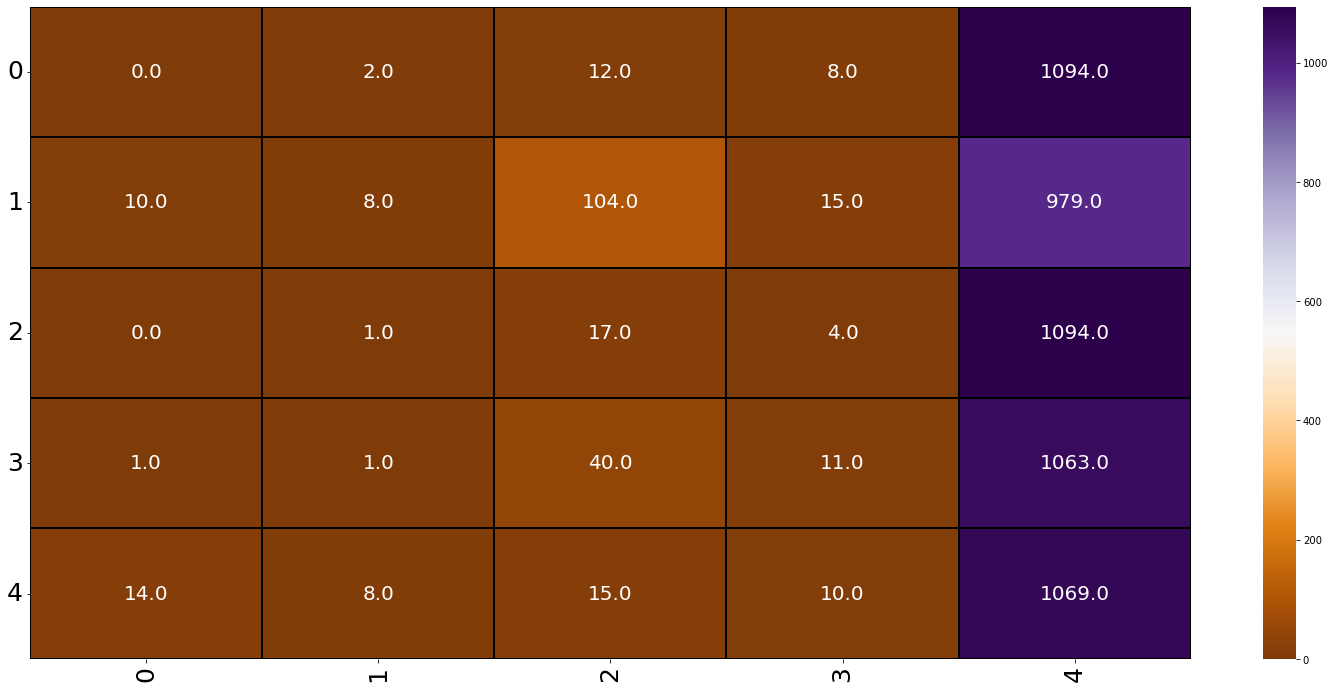

In [16]:
fig = plt.subplots(figsize=(26, 12));
sns.heatmap(cm, cmap = "PuOr",annot = True, fmt='.1f',
            linewidths=0.2, linecolor = 'black',annot_kws={"size":20}, );

plt.yticks(rotation=0, size=25)
plt.xticks(rotation=90,size=25)
plt.show()